# Flight Price Prediction
## Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

## FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Read Dataset

In [2]:
DF = pd.read_excel('Data_Train.xlsx')
DF

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


This Dataset has 10683 Rows and 11 Columns.The target variable is Price which is a continous data.We will build a predicting model for Continopus data that is regression model.

## Exploratory Data Analysis 

In [3]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


This shows that Dataset has all the columns with object type data except Price. There seems no null values, however we will check seperately and use the encoding and imputation techniques to make the data ready for modelling.

In [4]:
DF.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Here Route and Total_stops haver 1 null value

<AxesSubplot:>

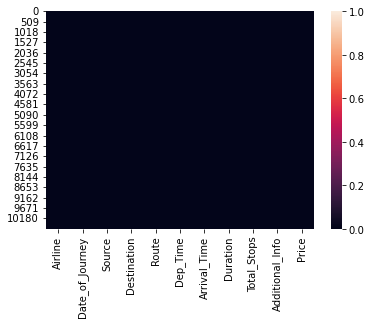

In [5]:
sns.heatmap(DF.isnull())

In [6]:
DF.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [7]:
DF.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

We see here that python is showing Date id Journey, departure time and arrival time as object hence we will have to convert it to timestamp for modelling.

In [8]:
for i in DF.columns:
    print(DF[i].value_counts())
    print('______________________*****_________________________')

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
______________________*****_________________________
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9

From the above value counts we can observe some repeated categories in some columns.

### Data Cleaning

In [9]:
DF['Date_of_Journey'] = pd.to_datetime(DF['Date_of_Journey'])
DF['Dep_Time'] = pd.to_datetime(DF['Dep_Time'])
DF['Arrival_Time'] = pd.to_datetime(DF['Arrival_Time'])

In [10]:
DF.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [11]:
# Extracting Day from Date_of_Journey column
DF["Journey_Day"] = pd.to_datetime(DF.Date_of_Journey, format="%d/%m/%Y").dt.day

# Extracting Month from Date_of_Journey column
DF["Journey_Month"] = pd.to_datetime(DF.Date_of_Journey, format="%d/%m/%Y").dt.month

In [12]:
DF.drop('Date_of_Journey',axis = 1,inplace = True)

Now the column Duration has values in terms of minutes and Hours.

In [13]:
duration = list(DF["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]     

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

In [14]:
DF['Duration_hours'] = duration_hours
DF['Duration_min'] = duration_mins

DF.drop('Duration',axis=1,inplace=True)

Let's extract values from Dep_Time. Departure time means when aflight leaves the airport and this column contains hours and minutes so we will extract hours and minutes from Dep_Time.

In [15]:
# Extracting Hours from Dep_Time column
DF['Dep_Hour'] = pd.to_datetime(DF['Dep_Time']).dt.hour

# Extracting Minutes from Dep_Time column
DF['Dep_Min'] = pd.to_datetime(DF['Dep_Time']).dt.minute

In [16]:
# Dropping Dep_Time column
DF.drop('Dep_Time',axis = 1,inplace=True)

Similarly we can extract hours and minutes from Arrival_Time column and accordingly dropping Arrival_Time column.

In [17]:
# Arrival time is time of arrival at the destination.

# Extracting hour from Arrival_Time
DF["Arrival_Hour"] = pd.to_datetime(DF["Arrival_Time"]).dt.hour

# Extracting Minutes from Arrival_Time column
DF["Arrival_Min"] = pd.to_datetime(DF["Arrival_Time"]).dt.minute

# Dropping Arrival_Time column
DF.drop("Arrival_Time",axis=1,inplace=True)

Now we have extracted values from the respective columns,let's check the data frame after feature engineering.

In [18]:
DF.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_min,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,4,45,16,50,21,35


In [19]:
DF.shape

(10683, 15)

In [20]:
DF['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [21]:
DF['Airline'] = DF['Airline'].replace('Jet Airways Business','Jet Airways')
DF['Airline'] = DF['Airline'].replace('Multiple carriers Premium economy','Multiple carriers')
DF['Airline'] = DF['Airline'].replace('Vistara Premium economy','Vistara')

In [22]:
DF['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [23]:
DF['Destination'] = DF['Destination'].replace('New Delhi','Delhi')

In [24]:
DF['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [25]:
DF['Additional_Info'] = DF['Additional_Info'].replace('No info','No Info')
DF['Additional_Info'] = DF['Additional_Info'].replace(['1 Long layover','2 Long layover'],'Long layover')

In [26]:
val_count = ['Airline','Destination','Additional_Info']

for i in val_count:
    print(DF[i].value_counts())
    print('______________________*****_________________________')

Jet Airways          3855
IndiGo               2053
Air India            1752
Multiple carriers    1209
SpiceJet              818
Vistara               482
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64
______________________*****_________________________
Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
______________________*****_________________________
No Info                         8348
In-flight meal not included     1982
No check-in baggage included     320
Long layover                      20
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64
______________________*****_________________________


In [27]:
DF.nunique()

Airline               9
Source                5
Destination           5
Route               128
Total_Stops           5
Additional_Info       8
Price              1870
Journey_Day           9
Journey_Month         7
Duration_hours       44
Duration_min         12
Dep_Hour             24
Dep_Min              12
Arrival_Hour         24
Arrival_Min          12
dtype: int64

In [28]:
print('Flight route is:',DF['Route'].mode())
print('Flight Total Stops is:',DF['Total_Stops'].mode())

Flight route is: 0    DEL → BOM → COK
Name: Route, dtype: object
Flight Total Stops is: 0    1 stop
Name: Total_Stops, dtype: object


In [29]:
DF['Route'] = DF['Route'].fillna(DF['Route'].mode()[0])
DF['Total_Stops'] = DF['Total_Stops'].fillna(DF['Total_Stops'].mode()[0])

In [30]:
DF.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Price              0
Journey_Day        0
Journey_Month      0
Duration_hours     0
Duration_min       0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

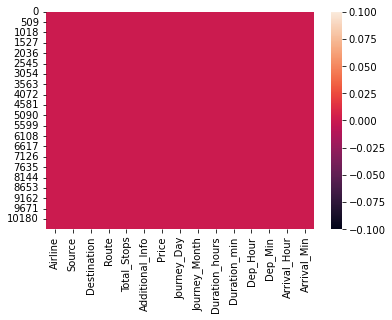

In [31]:
sns.heatmap(DF.isnull());

we have successfully imputed the null values now

In [32]:
DF.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Journey_Month',
       'Duration_hours', 'Duration_min', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour',
       'Arrival_Min'],
      dtype='object')

In [33]:
DF['Price'].value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
14153      1
8488       1
7826       1
6315       1
12648      1
Name: Price, Length: 1870, dtype: int64

### Statistical

In [34]:
DF.describe()

,Price,Journey_Day,Journey_Month,Duration_hours,Duration_min,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,9087.064121,12.682205,5.534775,10.246092,28.327717,12.490686,24.411214,13.348778,24.690630
std,4611.359167,8.803701,2.987489,8.495414,16.945400,5.748650,18.767980,6.859125,16.506036
min,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,5.000000,3.000000,2.000000,15.000000,8.000000,5.000000,8.000000,10.000000
50%,8372.000000,6.000000,5.000000,8.000000,30.000000,11.000000,25.000000,14.000000,25.000000
75%,12373.000000,21.000000,6.000000,15.000000,45.000000,18.000000,40.000000,19.000000,35.000000
max,79512.000000,27.000000,12.000000,47.000000,55.000000,23.000000,55.000000,23.000000,55.000000


The summary of this dataset looks perfect since there is no negative/invalid values present.It gives the summary of numerical data.
##### From the above description we can observe the following things-
The counts of every column is same which means there are no missing values preent in the dataset. The mean value is greater than the median(50%) in the columns Price, Journey_Day,Duration_hours and Dep_Hour so we can say they are skewed to right. The median(50%) is bit greater than mean in Duration_mins, Dep_Min, Arrival_Hour and Arrival_Min which means they are skewed to left. From the description we can say the minimum price of the flight ticket is Rs.1759 and maximum price is Rs.79512 also the mean is 9087. In summarizing the data we can observe that there is huge difference in maximum and 75% percentile in the columns Price, Arrival_Min, that means huge outliers present in those columns. These differences can also be seen in many other columns.

Before going to visualize the data, we will separate numerical and categorical column for better understanding.

In [35]:
cat_col = []
num_col = []

for i in DF.dtypes.index:
    if DF.dtypes[i] == 'object':
        cat_col.append(i)
    else:
        num_col.append(i)
        
        
print('Categorical Columns \n',cat_col)
print('Numerical Columns \n',num_col)

Categorical Columns 
 ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']
Numerical Columns 
 ['Price', 'Journey_Day', 'Journey_Month', 'Duration_hours', 'Duration_min', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min']


### Data Visualization

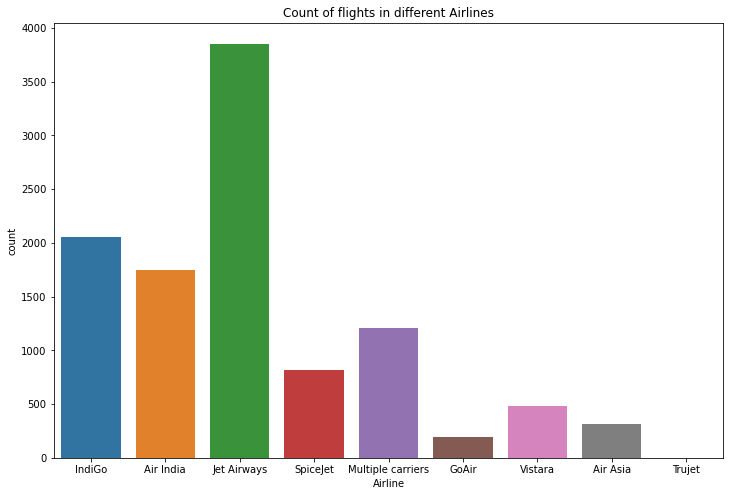

In [36]:
plt.figure(figsize =(12,8))
sns.countplot(DF['Airline'])
plt.title('Count of flights in different Airlines');

We can see from the graph that jet airways has the highest counts.

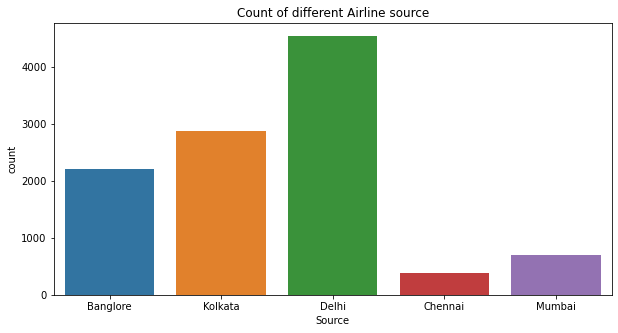

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(DF['Source'])
plt.title('Count of different Airline source');

We can here see that max flights are from Delhi

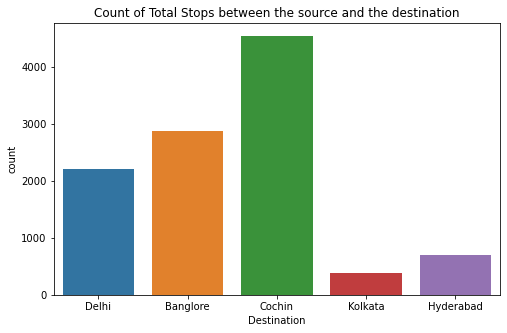

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(DF['Destination'])
plt.title('Count of Total Stops between the source and the destination');

We can see from the above graph that the max flights are to the destination Cochin.

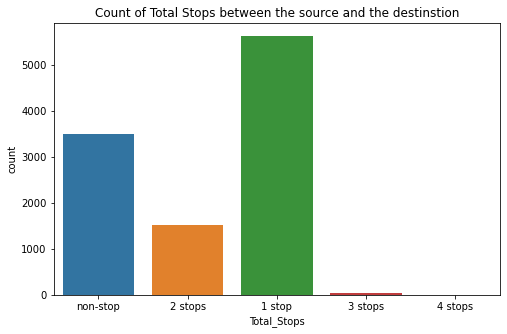

In [39]:
plt.figure(figsize=(8,5))
sns.countplot(DF['Total_Stops'])
plt.title('Count of Total Stops between the source and the destinstion');

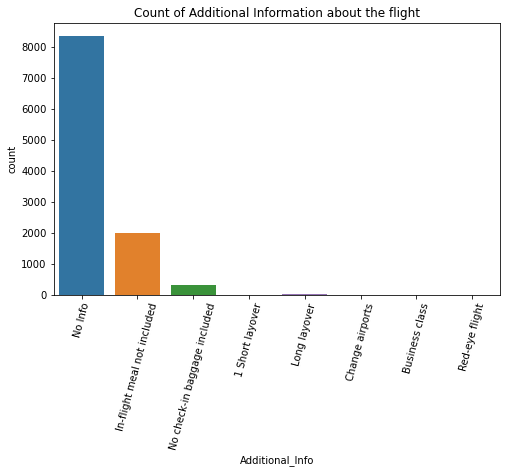

In [40]:
plt.figure(figsize=(8,5))
sns.countplot(DF['Additional_Info'])
plt.title('Count of Additional Information about the flight')
plt.xticks(rotation=75);

The graph clearly represent that we have multiple classes in the additional_info feature, with no_info with major counts followed by in flight meal and then in flight meal and in flight meal not included.

### Visualizing the disribution of the numerical columns

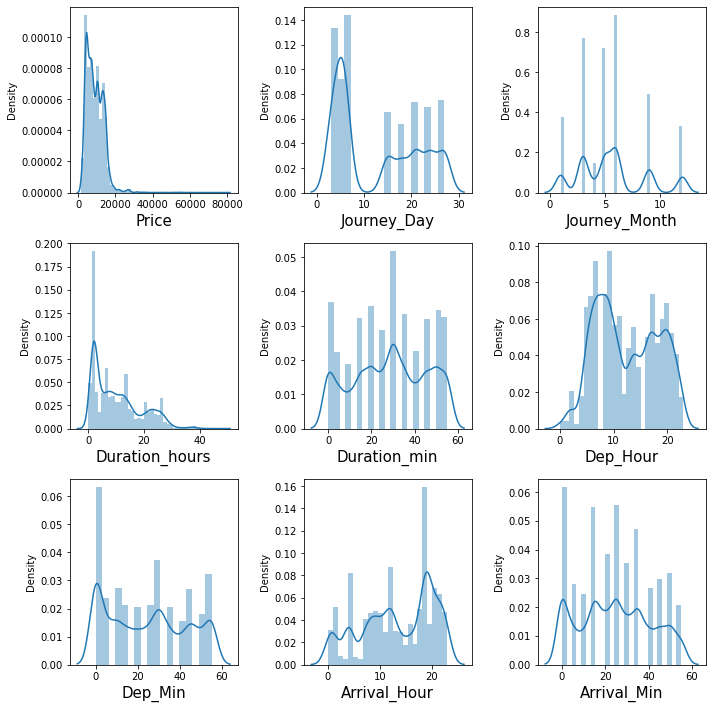

In [41]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber = 1
for column in num_col:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(DF[column])
        plt.xlabel(column,fontsize=15)
    plotnumber +=1
plt.tight_layout()

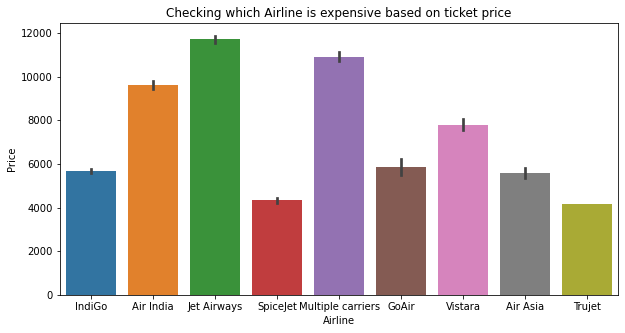

In [42]:
plt.figure(figsize=(10,5))
sns.barplot(DF['Airline'],DF['Price'],data=DF)
plt.title('Checking which Airline is expensive based on ticket price')
plt.show()

From the plot we can visualize that Jet Airways is the most expensive and SpiceJet and Trujet are the cheapest.

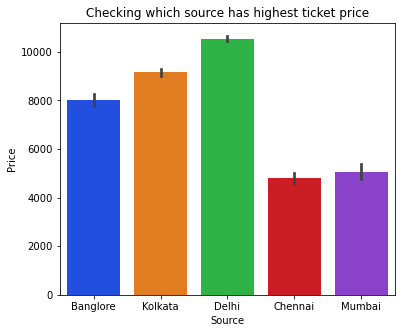

In [43]:
plt.figure(figsize=(6,5))
sns.barplot(DF['Source'],DF['Price'],data=DF,palette='bright')
plt.title('Checking which source has highest ticket price')
plt.show()

The ticket prices are expensive in Delhi region compared to others and price is cheaper in Chennai and Mumbai sources.

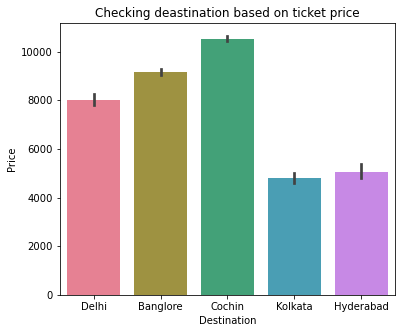

In [44]:
plt.figure(figsize=(6,5))
sns.barplot(DF['Destination'],DF['Price'],data = DF,palette='husl')
plt.title("Checking deastination based on ticket price")
plt.show()

The ticket price is high in Cochin Destination followed by Bangalore which means they have long distance from the source.

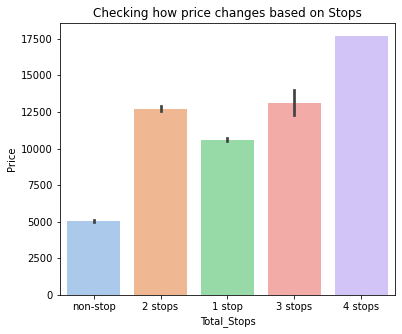

In [45]:
plt.figure(figsize=(6,5))
sns.barplot(DF['Total_Stops'],DF['Price'],data=DF,palette='pastel')
plt.title("Checking how price changes based on Stops")
plt.show()

From the plot we can vislualize that the flights with 4 Stops have highest price followed by flights having 3 stops and the flights which have no stops is having very less ticket price compared to others.

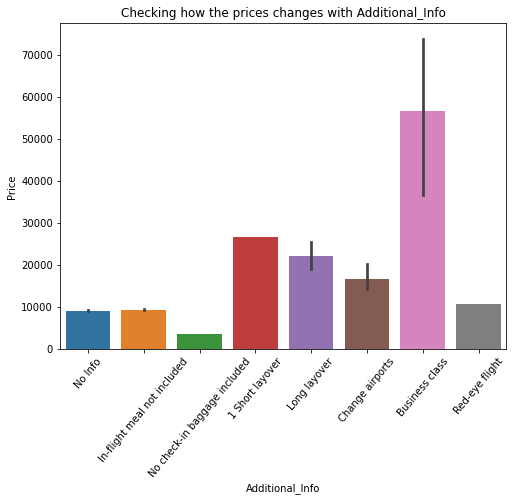

In [46]:
plt.figure(figsize=(8,6))
sns.barplot(DF['Additional_Info'],DF['Price'],data=DF)
plt.title("Checking how the prices changes with Additional_Info")
plt.xticks(rotation=50)
plt.show()

The plot shows that the Business class flights are more expensive compared to others and the flights having the class No check-in baggage included has very least ticket price.

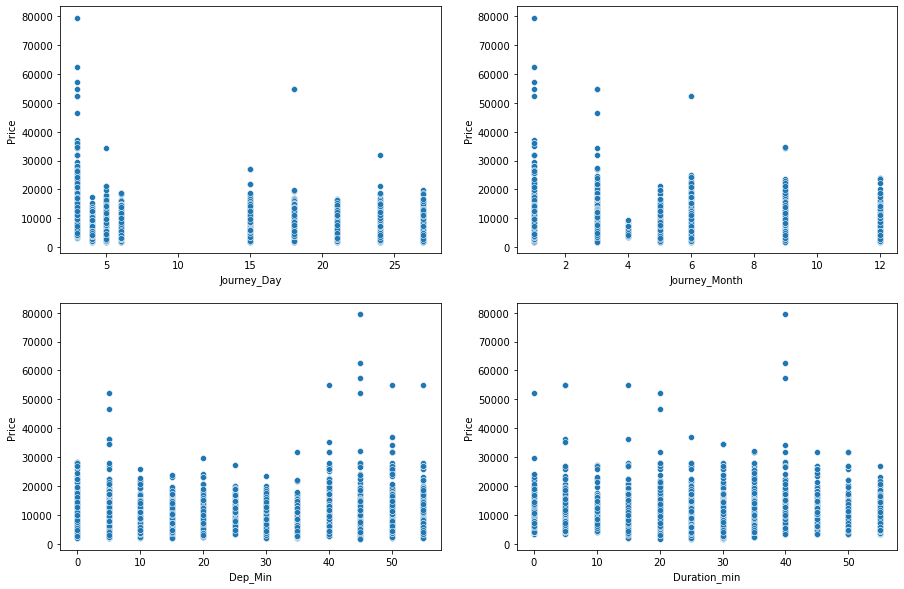

In [47]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

sns.scatterplot(x='Journey_Day',y='Price',ax=axes[0,0],data=DF)

sns.scatterplot(x='Journey_Month',y='Price',ax=axes[0,1],data=DF)

sns.scatterplot(x='Dep_Min',y='Price',ax=axes[1,0],data=DF)

sns.scatterplot(x='Duration_min',y='Price',ax=axes[1,1],data=DF)
plt.show()

From the above plots we can observe the following

While comparing Journey_Day and Price we can see the price of ticket is high in day 3 apart from this there is no much impact of day on ticket price.

While comparing Journey_Month and Price it can be inferred that the flights travelling in the January month are more expensive than others and the flights travelling in April month have very cheap ticket prices.

There in no significance relation between Dep_MIn and Price of the tickets.

In the fourth graph also we can say there is no much impact of Duraation_mins on Price. But we can say duration minutes 10 and 5 have bit high prices compared to others.

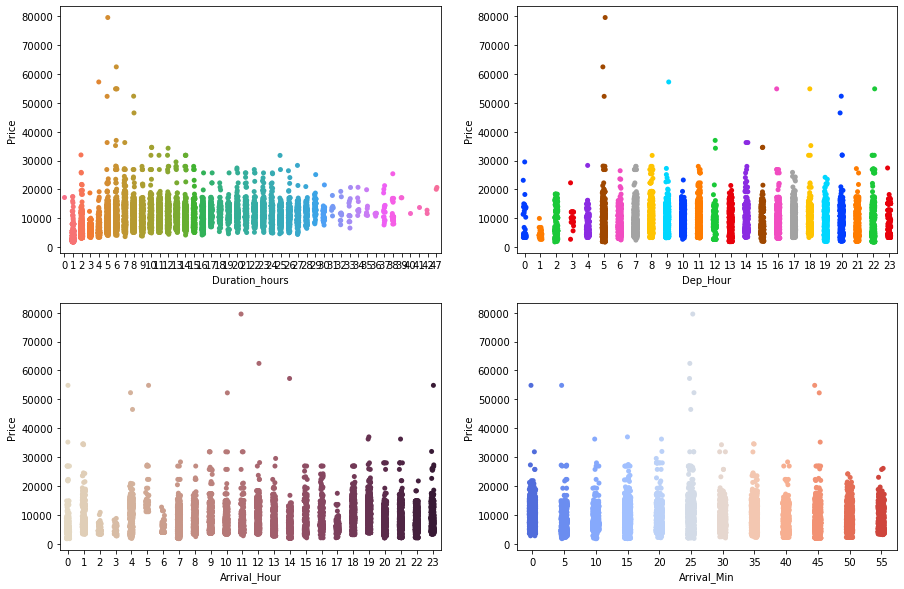

In [48]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

sns.stripplot(x='Duration_hours',y='Price',ax=axes[0,0],data=DF,palette="husl")

sns.stripplot(x='Dep_Hour',y='Price',ax=axes[0,1],data=DF,palette="bright")

sns.stripplot(x='Arrival_Hour',y='Price',ax=axes[1,0],data=DF, palette="ch:.28")

sns.stripplot(x='Arrival_Min',y='Price',ax=axes[1,1],data=DF,palette="coolwarm")
plt.show()


From the above plots we can observe there is no much significance differences in any of the classes with the Price.

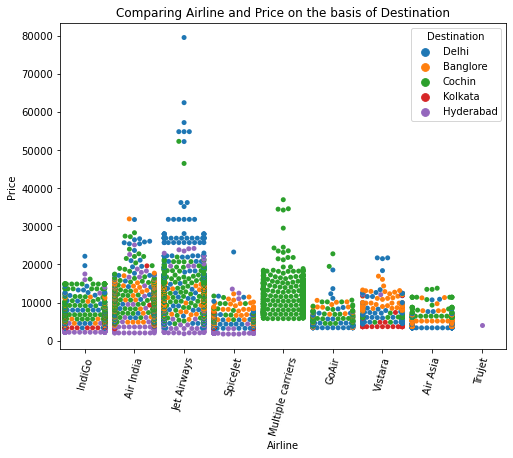

In [49]:
plt.figure(figsize=(8,6))
sns.swarmplot(x=DF['Airline'],y=DF['Price'],hue=DF["Destination"])
plt.title("Comparing Airline and Price on the basis of Destination")
plt.xticks(rotation=75)
plt.show()

Here we can conclude that the Jet Airways flights that are destined to Delhi are have more expensive ticket prices compared to others.

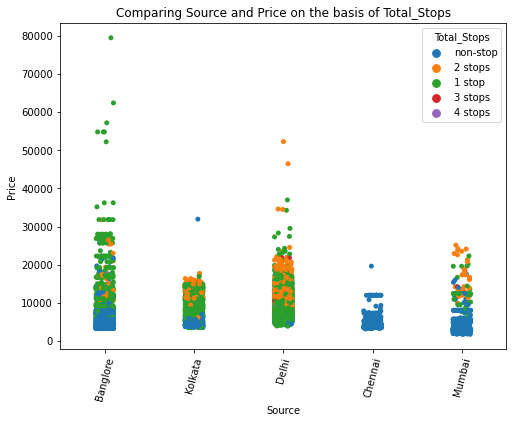

In [50]:
plt.figure(figsize=(8,6))
sns.stripplot(x=DF['Source'],y=DF['Price'],hue=DF['Total_Stops'])
plt.title("Comparing Source and Price on the basis of Total_Stops")
plt.xticks(rotation=75)
plt.show()

As we can notice that the flights in the Bangalore source which have only one stop between source and destination have very expensive ticket price and the flights in Chennai with no stops have very cheap prices compared to other source flights.

### Multivariate Analysis

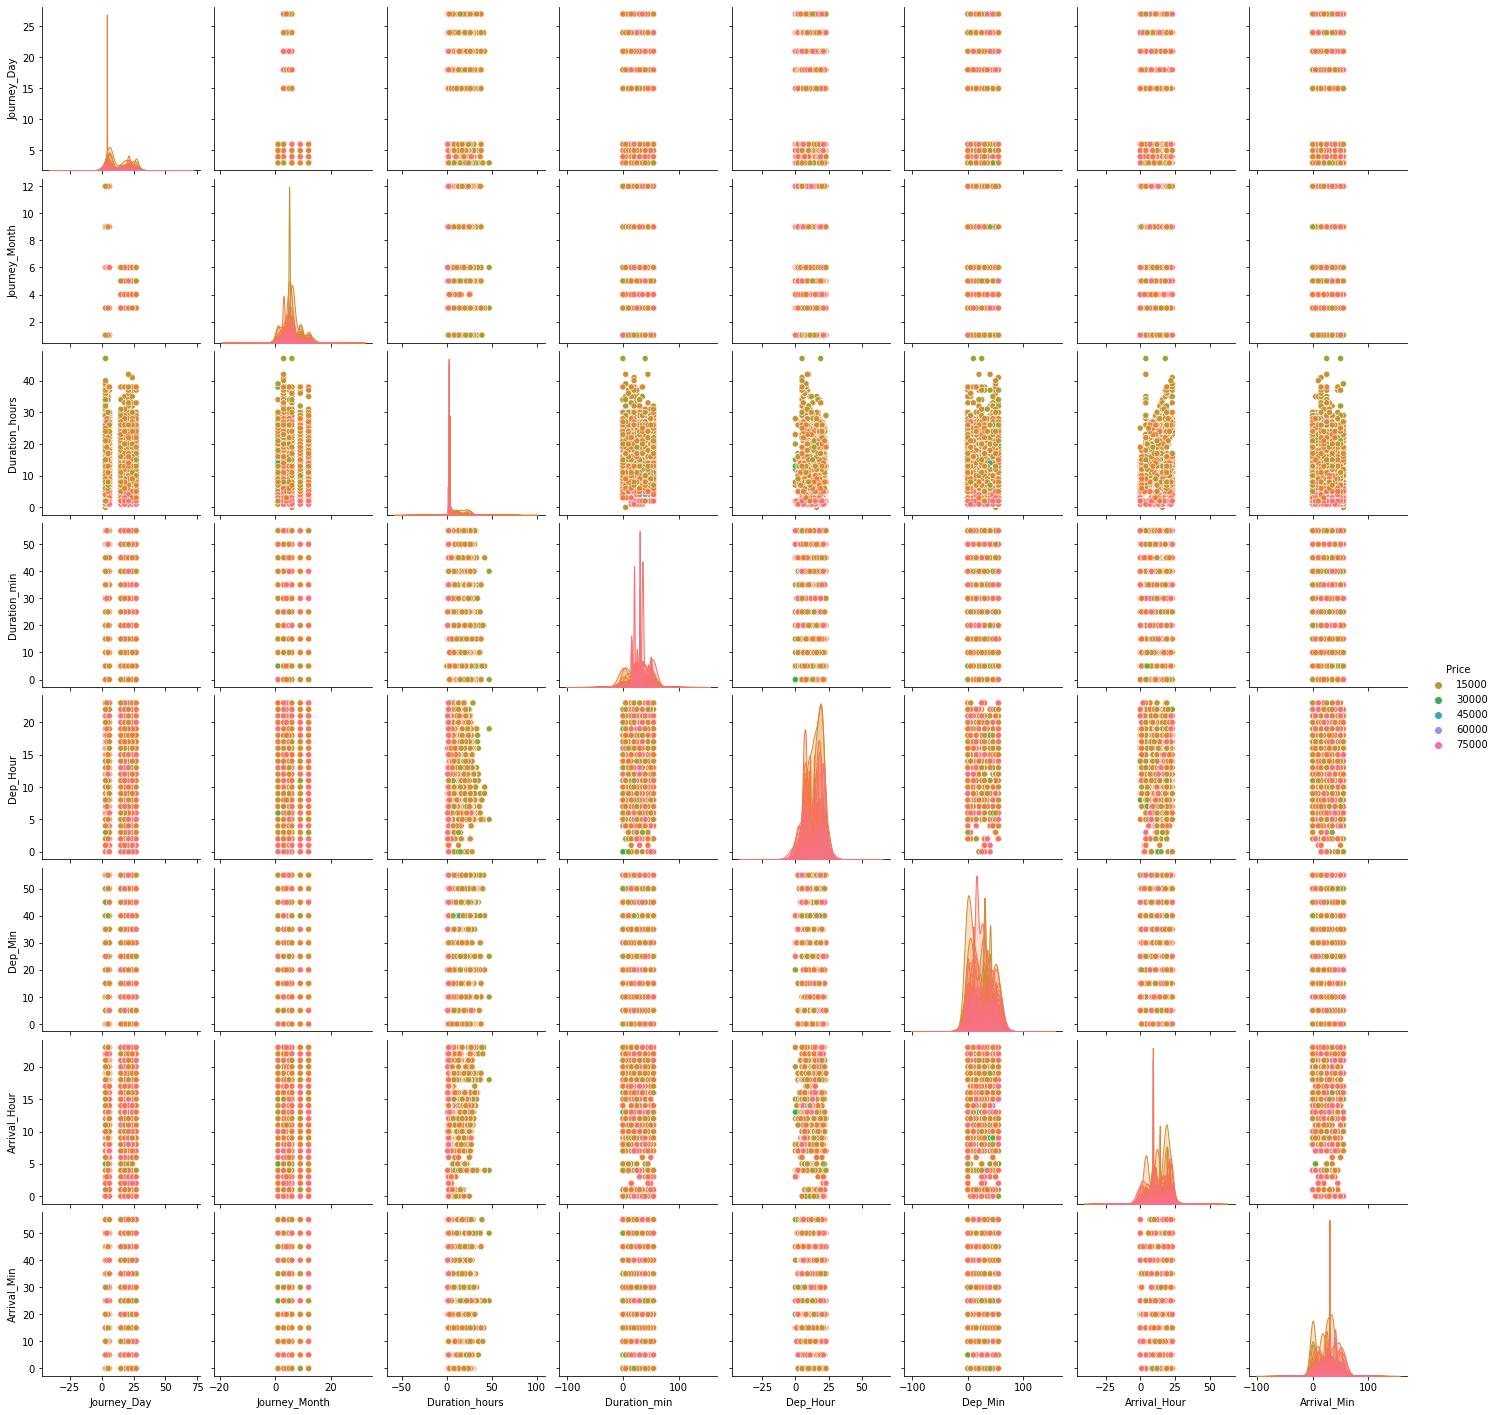

In [51]:
sns.pairplot(DF,hue='Price',palette='husl')
plt.show()

This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "Price". Here we can observe the relation between the features and label.

### Identifying the outliers

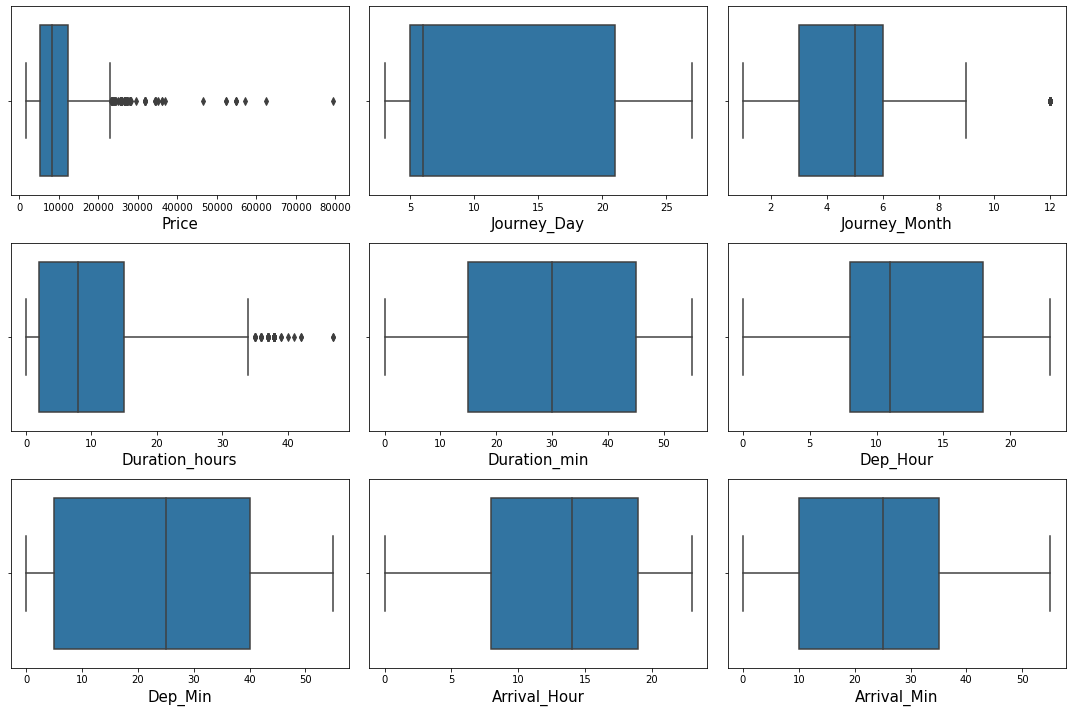

In [52]:
plt.figure(figsize=(15,10))
plotnumber = 1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(DF[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

The outliers present in Price, Journey_Month and Duration_hours.Since Price is our target column so no need to remove outliers in this two columns.

### Removing Outliers

In [53]:
feature = DF[['Duration_hours','Journey_Month']]

import scipy as stats
from scipy.stats import zscore
z=np.abs(zscore(feature))

z

,Duration_hours,Journey_Month
0,0.970698,0.848503
1,0.382117,1.517993
2,1.030476,1.159966
3,0.617549,2.164201
4,0.735265,1.517993
...,...,...
10678,0.970698,1.159966
10679,0.970698,0.513758
10680,0.852981,0.513758
10681,0.970698,1.517993


In [54]:
New_DF = DF[(z<3).all(axis=1)]
New_DF

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_min,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No Info,3897,24,3,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No Info,7662,5,1,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No Info,13882,6,9,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No Info,6218,5,12,5,25,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No Info,13302,3,1,4,45,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No Info,4107,4,9,2,30,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No Info,4145,27,4,2,35,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No Info,7229,27,4,3,0,8,20,11,20
10681,Vistara,Banglore,Delhi,BLR → DEL,non-stop,No Info,12648,3,1,2,40,11,30,14,10


This is the new dataset after removing the outliers. Here we have removed the outliers whose Zscore is less than 3.

In [55]:
New_DF.skew().sort_values()

Arrival_Hour     -0.361250
Duration_min     -0.097354
Dep_Hour          0.103798
Arrival_Min       0.107805
Dep_Min           0.164551
Journey_Day       0.367029
Journey_Month     0.628224
Duration_hours    0.761022
Price             1.824502
dtype: float64

We can find the columns Price, Journey_Month and Duration_hours have skewness but will remove skewness in Duration_hours and Journey_Month as they are numerical columns.

In [57]:
New_DF['Duration_hours'] = np.log1p(New_DF['Duration_hours'])
New_DF['Journey_Month'] = np.log1p(New_DF['Journey_Month'])

In [58]:
New_DF.skew().sort_values()

Journey_Month    -0.533689
Arrival_Hour     -0.361250
Duration_hours   -0.109197
Duration_min     -0.097354
Dep_Hour          0.103798
Arrival_Min       0.107805
Dep_Min           0.164551
Journey_Day       0.367029
Price             1.824502
dtype: float64

We can observe the skewness has been removed in Duration_hours and Journey_Month columns. Let's visualize it.

### Encoding

In [59]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
New_DF[cat_col] = New_DF[cat_col].apply(LE.fit_transform)
New_DF

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_min,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,2,18,4,5,3897,24,1.386294,1.098612,50,22,20,1,10
1,1,3,0,84,1,5,7662,5,0.693147,2.079442,25,5,50,13,15
2,4,2,1,118,1,5,13882,6,2.302585,2.995732,0,9,25,4,25
3,3,3,0,91,0,5,6218,5,2.564949,1.791759,25,18,5,23,30
4,3,0,2,29,0,5,13302,3,0.693147,1.609438,45,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,4,5,4107,4,2.302585,1.098612,30,19,55,22,25
10679,1,3,0,64,4,5,4145,27,1.609438,1.098612,35,20,45,23,20
10680,4,0,2,18,4,5,7229,27,1.609438,1.386294,0,8,20,11,20
10681,8,0,2,18,4,5,12648,3,0.693147,1.098612,40,11,30,14,10


Now we have converted the categorical columns into numerical columns using label encoding method.

### Checking the corelation

In [60]:
cor = New_DF.corr()
cor

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_min,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
Airline,1.000000,-0.013641,0.055391,0.021921,-0.010497,-0.056234,0.024773,0.025366,0.005402,-0.076407,-0.043858,-0.028238,-0.070340,-0.005868,-0.087465
Source,-0.013641,1.000000,-0.434677,0.404009,-0.225922,-0.034128,0.016718,0.007158,0.062011,0.149110,-0.145872,0.059469,-0.055929,0.026144,0.021640
Destination,0.055391,-0.434677,1.000000,-0.230755,0.510659,0.115602,-0.263334,0.007309,-0.061873,-0.493825,0.021895,-0.088810,0.097052,-0.058190,0.006954
Route,0.021921,0.404009,-0.230755,1.000000,-0.439372,0.002232,0.163635,0.096042,0.076196,0.383743,-0.229643,-0.070005,-0.066420,0.011514,-0.174071
Total_Stops,-0.010497,-0.225922,0.510659,-0.439372,1.000000,0.234493,-0.572413,0.043711,-0.048791,-0.806706,0.182696,0.038512,0.049105,-0.095213,0.176915
Additional_Info,-0.056234,-0.034128,0.115602,0.002232,0.234493,1.000000,-0.114590,-0.012301,-0.025319,-0.255705,0.059669,-0.052282,0.008984,-0.005902,0.044179
Price,0.024773,0.016718,-0.263334,0.163635,-0.572413,-0.114590,1.000000,-0.163765,-0.013511,0.605075,-0.122893,0.011430,-0.025585,0.021107,-0.088909
Journey_Day,0.025366,0.007158,0.007309,0.096042,0.043711,-0.012301,-0.163765,1.000000,-0.097582,-0.041874,-0.008671,-0.002628,-0.017421,-0.001501,-0.021901
Journey_Month,0.005402,0.062011,-0.061873,0.076196,-0.048791,-0.025319,-0.013511,-0.097582,1.000000,0.062242,-0.023684,0.020587,-0.005264,-0.005743,-0.031453
Duration_hours,-0.076407,0.149110,-0.493825,0.383743,-0.806706,-0.255705,0.605075,-0.041874,0.062242,1.000000,-0.166151,0.000980,-0.033117,0.060794,-0.127237


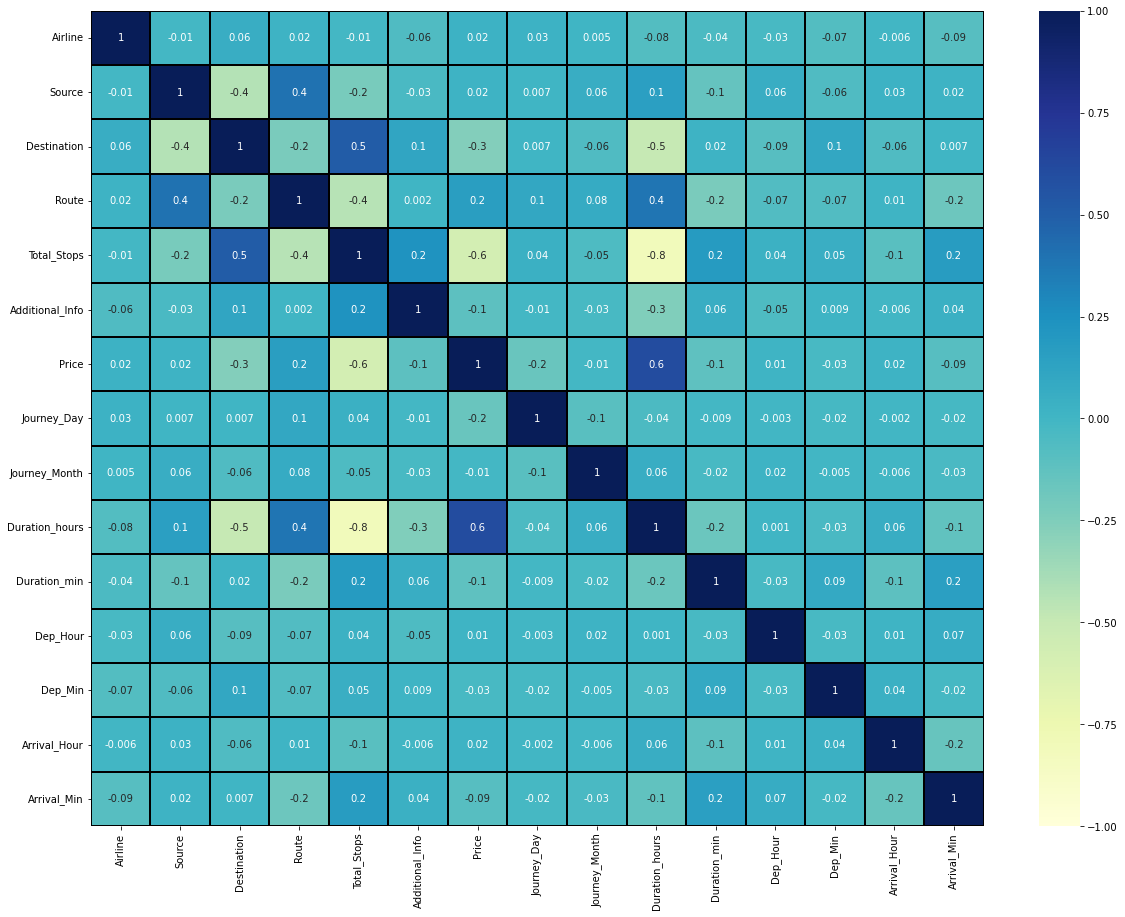

In [62]:
plt.figure(figsize=(20,15))
sns.heatmap(New_DF.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0);

### Visualizing the correlation Using bar plot

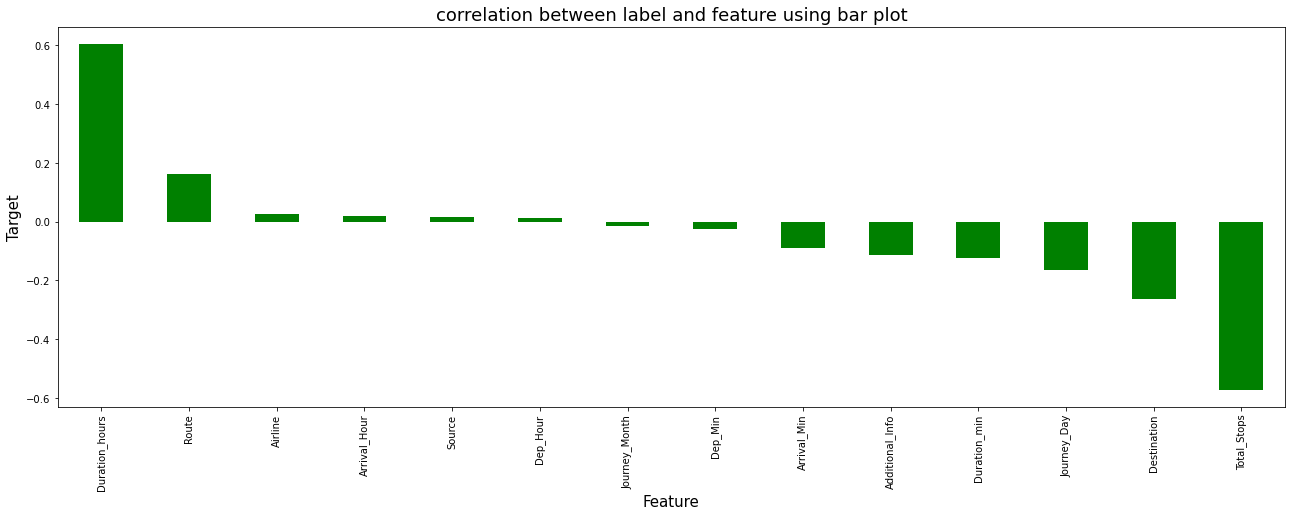

In [63]:
plt.figure(figsize=(22,7))
New_DF.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

### Data Pre-processing

In [64]:
X = New_DF.drop('Price',axis=1)
Y = New_DF['Price']

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_min,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,-0.345488,-1.655042,0.812707,-1.544003,1.402360,0.424603,1.286176,-0.754967,-1.183984,1.274299,1.649475,-0.235894,-1.794784,-0.889208
1,-1.464134,0.888124,-1.157048,0.254498,-0.253797,0.424603,-0.873920,-2.141814,-0.009867,-0.201145,-1.312186,1.362715,-0.046050,-0.586465
2,0.213836,0.040402,-0.172170,1.180998,-0.253797,0.424603,-0.760231,1.078344,1.086993,-1.676590,-0.615325,0.030541,-1.357601,0.019019
3,-0.345488,0.888124,-1.157048,0.445248,-0.805850,0.424603,-0.873920,1.603281,-0.354241,-0.201145,0.952614,-1.035199,1.411228,0.321762
4,-0.345488,-1.655042,0.812707,-1.244253,-0.805850,0.424603,-1.101299,-2.141814,-0.572492,0.979210,0.604183,1.362715,1.119772,0.624504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10612,-2.023458,0.888124,-1.157048,-0.290502,1.402360,0.424603,-0.987609,1.078344,-1.183984,0.093944,1.126829,1.629150,1.265500,0.019019
10613,-1.464134,0.888124,-1.157048,-0.290502,1.402360,0.424603,1.627244,-0.308502,-1.183984,0.389033,1.301044,1.096280,1.411228,-0.283723
10614,0.213836,-1.655042,0.812707,-1.544003,1.402360,0.424603,1.627244,-0.308502,-0.839609,-1.676590,-0.789540,-0.235894,-0.337506,-0.283723
10615,2.451129,-1.655042,0.812707,-1.544003,1.402360,0.424603,-1.101299,-2.141814,-1.183984,0.684121,-0.266894,0.296976,0.099677,-0.889208


We have scaled the data using standard scalarizaion method to overcome with the issue of data biasness.

### Cheacking VIF

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features'] = X.columns
vif

,VIF Values,Features
0,1.044046,Airline
1,1.511995,Source
2,1.762240,Destination
3,1.583264,Route
4,3.330957,Total_Stops
5,1.107199,Additional_Info
6,1.035552,Journey_Day
7,1.022110,Journey_Month
8,3.175330,Duration_hours
9,1.125160,Duration_min


## Model

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score
maxAccu=0
maxRS=0

for i in range(1,200):
    X_train,X_test, Y_train, Y_test=train_test_split(X,Y,test_size=.30, random_state=i)
    RFR=RandomForestRegressor()
    RFR.fit(X_train,Y_train)
    predRFR=RFR.predict(X_test)
    acc=r2_score(Y_test,predRFR)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9173402134664584  on Random_state  181


In [72]:
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(RFR.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

,Importance
Features,
Duration_hours,0.429
Journey_Day,0.121
Airline,0.100
Journey_Month,0.074
Additional_Info,0.066
Total_Stops,0.048
Route,0.039
Arrival_Hour,0.030
Dep_Hour,0.028


### Train Test Split

In [73]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.3,random_state=maxRS)

### Linear Regression

In [98]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

LR=LinearRegression()
LR.fit(X_train,Y_train)
# [Prediction]
predLR = LR.predict(X_test)
print('R2 Score:',r2_score(Y_test,predLR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predLR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predLR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predLR)))

R2 Score: 0.4545405649979327
Mean Absolute Error 2407.616134334717
Mean Squared Error 11058636.747255903
Root Mean Squared Error 3325.452863484296


### Linear Regression with Ridge

In [99]:
from sklearn.model_selection import GridSearchCV
paramsRidge ={'alpha':[0.01,0.1,1.0,10.26],'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
ridge = Ridge()
clf = GridSearchCV(ridge,paramsRidge)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'alpha': 0.1, 'solver': 'sag'}


In [100]:
ridge = Ridge(alpha = 10.26,solver = 'sag')
ridge.fit(X_train,Y_train)
ridge.score(X_train,Y_train)
pred_ridge = ridge.predict(X_test)
print('R2 Score:',r2_score(Y_test,pred_ridge))
print('Mean Absolute Error',mean_absolute_error(Y_test,pred_ridge))
print('Mean Squared Error',mean_squared_error(Y_test,pred_ridge))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,pred_ridge)))

R2 Score: 0.45455244568629627
Mean Absolute Error 2407.7458351384917
Mean Squared Error 11058395.87835074
Root Mean Squared Error 3325.4166473316905


### Linear Regression With Lasso

In [101]:
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
lasso = Lasso()
clf=GridSearchCV(lasso,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [102]:
lasso = Lasso(alpha=1,random_state=0)
lasso.fit(X_train,Y_train)
lasso.score(X_train,Y_train)
pred_lasso = lasso.predict(X_test)
print('R2 Score:',r2_score(Y_test,pred_lasso))
print('Mean Absolute Error',mean_absolute_error(Y_test,pred_lasso))
print('Mean Squared Error',mean_squared_error(Y_test,pred_lasso))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,pred_lasso)))

R2 Score: 0.45459285425395657
Mean Absolute Error 2407.200490933006
Mean Squared Error 11057576.635630647
Root Mean Squared Error 3325.293466091474


### Random Forest Regressor

In [75]:
RFR = RandomForestRegressor()
RFR.fit(X_train,Y_train)
# [Prediction]
predRFR = RFR.predict(X_test)
print('R2 Score:',r2_score(Y_test,predRFR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predRFR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predRFR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predRFR)))

R2 Score: 0.9193581139660773
Mean Absolute Error 649.7602715526261
Mean Squared Error 1634932.4386686631
Root Mean Squared Error 1278.644766410383


### GradientBoostingRegressor

In [77]:
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor()
GB.fit(X_train,Y_train)

# [Prediction]
predGB = GB.predict(X_test)
print('R2 Score:',r2_score(Y_test,predGB))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predGB))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predGB))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predGB)))

R2 Score: 0.8347866617995789
Mean Absolute Error 1234.5313667775051
Mean Squared Error 3349532.8446432864
Root Mean Squared Error 1830.1729002045918


### Bagging Regressor

In [78]:
from sklearn.ensemble import BaggingRegressor
BR = BaggingRegressor()
BR.fit(X_train,Y_train)

# [Prediction]
predBR = BR.predict(X_test)
print('R2 Score:',r2_score(Y_test,predBR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predBR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predBR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predBR)))

R2 Score: 0.8860105515743499
Mean Absolute Error 690.5870216049383
Mean Squared Error 2311020.4394109496
Root Mean Squared Error 1520.2040782115241


### Decision Tree Regressor

In [79]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(X_train,Y_train)

# [Prediction]
predDTR = DTR.predict(X_test)
print('R2 Score:',r2_score(Y_test,predDTR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predDTR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predDTR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predDTR)))

R2 Score: 0.8420174497300473
Mean Absolute Error 708.3434295877798
Mean Squared Error 3202935.9540437325
Root Mean Squared Error 1789.6748179609983


### ExtraTrees Regressor

In [80]:
from sklearn.ensemble import ExtraTreesRegressor
ETR = ExtraTreesRegressor()
ETR.fit(X_train,Y_train)

# [Prediction]
predETR = ETR.predict(X_test)
print('R2 Score:',r2_score(Y_test,predETR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predETR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predETR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predETR)))

R2 Score: 0.9221477110042403
Mean Absolute Error 634.7936498221385
Mean Squared Error 1578376.1884020427
Root Mean Squared Error 1256.3344253828448


### XGB Regressor

In [82]:
from xgboost import XGBRegressor as xgb

xgb=xgb(verbosity=0)
xgb.fit(X_train,Y_train)

# prediction
predxgb=xgb.predict(X_test)
print('R2_Score:',r2_score(Y_test,predxgb))

# Mean Absolute Error(MAE)
print('Mean Absolute Error(MAE)',mean_absolute_error(Y_test, predxgb))

# Mean Squared Error(MSE)
print('Mean Squared Error(MAE)',mean_squared_error(Y_test, predxgb))

# Root Mean Squared Error (RMSE)
print("Root Mean Squared Error (RMSE)",np.sqrt(mean_squared_error(Y_test, predxgb)))

R2_Score: 0.9149629299351701
Mean Absolute Error(MAE) 756.0239834830361
Mean Squared Error(MAE) 1724040.3365547026
Root Mean Squared Error (RMSE) 1313.027165200592


### KNeighborsRegressor

In [94]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor()
KNN.fit(X_train,Y_train)

# [Prediction]
predKNN = KNN.predict(X_test)
print('R2 Score:',r2_score(Y_test,predKNN))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predKNN))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predKNN))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predKNN)))

R2 Score: 0.7339556083069126
Mean Absolute Error 1404.8056497175141
Mean Squared Error 5393780.174262397
Root Mean Squared Error 2322.451328717654


### Cross-Validation

In [84]:
from sklearn.model_selection import cross_val_score

# Checking cv score for Linear Regression
print('Linear Regression -->',cross_val_score(LR,X,Y,cv=5).mean())

# Checking cv score for Random Forest Regressor
print('Random Forest Regressor -->',cross_val_score(RFR,X,Y,cv=5).mean())

#Checking the cv score for GradientBoostingRegressor
print('GradientBoostingRegressor -->',cross_val_score(GB,X,Y,cv=5).mean())

#Checking the cv score for BaggingRegressor
print('BaggingRegressor -->',cross_val_score(BR,X,Y,cv=5).mean())

# Checking cv score for Decision Tree Regressor
print('Decision Tree Regressor -->',cross_val_score(DTR,X,Y,cv=5).mean())

# Checking cv score for ExtraTrees Regressor
print('ExtraTrees Regressor -->',cross_val_score(ETR,X,Y,cv=5).mean())

# Checking cv score for XGBRegressor
print('XGBRegressor:',cross_val_score(xgb,X,Y,cv=5).mean())

Linear Regression --> 0.4316558552690717
Random Forest Regressor --> 0.8810073887921728
GradientBoostingRegressor --> 0.8084836315797004
BaggingRegressor --> 0.8650757244501766
Decision Tree Regressor --> 0.7864127637452772
ExtraTrees Regressor --> 0.8994189717622341
XGBRegressor: 0.8943838253338647


Based on the model score and the cross val score we have found that XGB Regressor as our best fitting model. We will perform Hyper parameter tuning on the best model.

### Hyper Parameter tuning

In [85]:
#XGB Regressor

parameters = {'n_estimators' : [50,100,200, 400],
              'gamma' : np.arange(0,0.5,0.1),
              'max_depth' : [4, 6, 8,10],
              'n_jobs' : [-2, -1, 1]}

In [87]:
from sklearn.model_selection import GridSearchCV
GCV = GridSearchCV(xgb,parameters,cv=5)
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat_to_onehot=4, max_delta_step=0,
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0,
                                    reg_alpha=0, reg_lambda=1, ...),
             param_grid={'gamma': array([0. , 0.1, 0.2, 0.3, 0.4]),
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [50, 100, 200, 400],
                         'n_jobs': [-2, -1, 1]})

In [88]:
GCV.best_params_

{'gamma': 0.0, 'max_depth': 4, 'n_estimators': 400, 'n_jobs': -2}

In [90]:
from xgboost import XGBRegressor as xgb
Fare = xgb(gamma=0.0, max_depth=4, n_estimators=400, n_jobs=-2)
Fare.fit(X_train, Y_train)

# prediction
predFare=Fare.predict(X_test)
print('R2_Score:',r2_score(Y_test,predFare)*100)

# Mean Absolute Error(MAE)
print('Mean Absolute Error(MAE)',mean_absolute_error(Y_test, predFare))

# Mean Squared Error(MSE)
print('Mean Squared Error(MAE)',mean_squared_error(Y_test, predFare))

# Root Mean Squared Error (RMSE)
print("Root Mean Squared Error (RMSE)",np.sqrt(mean_squared_error(Y_test, predFare)))

R2_Score: 91.0367724642861
Mean Absolute Error(MAE) 793.923939927
Mean Squared Error(MAE) 1817203.4626202045
Root Mean Squared Error (RMSE) 1348.036892158447


### Test Data

In [91]:
Test = pd.read_excel("Test_set.xlsx")
Test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


This test dataset has no target variable, we need to use our past data(trained data) to get the ticket price prediction.

In [103]:
Test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

### Feature Engineering

The columns Date_of_Journey, Dept_Time and Arrival_Time showing object data type which means python is not able to understand the type of data in this column.

Therefore, we have to convert this datatype into timestamp to use them properly for prediction

In [104]:
# Converting Date and Time columns from object type to Date Type
Test['Date_of_Journey']=pd.to_datetime(Test['Date_of_Journey'])
Test['Dep_Time']=pd.to_datetime(Test['Dep_Time'])
Test['Arrival_Time']=pd.to_datetime(Test['Arrival_Time'])

In [105]:
Test.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
dtype: object

In [106]:
# Extracting Day from Date_of_Journey column
Test["Journey_Day"] = pd.to_datetime(Test.Date_of_Journey, format="%d/%m/%Y").dt.day

# Extracting Month from Date_of_Journey column
Test["Journey_Month"] = pd.to_datetime(Test.Date_of_Journey, format="%d/%m/%Y").dt.month

# Dropping Date_of_Journey column
Test.drop("Date_of_Journey",axis=1,inplace=True)

In [107]:
# Converting duration column into list
duration=list(Test["Duration"])

for i in range(len(duration)):
    
    # Checking if duration contains oly hour or minute
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+' 0m'   
        else:
            duration[i]="0h "+ duration[i]
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    
    # Extracting hours feom Duration
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    
    # Extracting minutes from Duration
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [108]:
# Adding duration hours and duration mins to the data set
Test["Duration_hours"] = duration_hours
Test["Duration_mins"] = duration_mins

# Dropping Duration column
Test.drop("Duration",axis=1,inplace=True)

In [109]:
# Extracting Hours from Dep_Time column
Test["Dep_Hour"] = pd.to_datetime(Test["Dep_Time"]).dt.hour

# Extracting Minutes from Dep_Time column
Test["Dep_Min"] = pd.to_datetime(Test["Dep_Time"]).dt.minute
# Dropping Dep_Time column
Test.drop("Dep_Time",axis=1,inplace=True)

In [110]:
# Extracting hour from Arrival_Time
Test["Arrival_Hour"] = pd.to_datetime(Test["Arrival_Time"]).dt.hour

# Extracting Minutes from Arrival_Time column
Test["Arrival_Min"] = pd.to_datetime(Test["Arrival_Time"]).dt.minute

# Dropping Arrival_Time column
Test.drop("Arrival_Time",axis=1,inplace=True)

In [112]:
Test

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,10,55,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,5,12,4,0,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,23,45,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,13,0,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,2,50,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No info,6,6,23,55,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No info,27,3,2,35,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,3,6,6,35,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,3,6,15,15,4,0,19,15


In [114]:
# Checking the value counts of each columns
for i in Test.columns:
    print(f'_______________________{i}_____________________________')
    print(Test[i].value_counts(),'\n')

_______________________Airline_____________________________
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64 

_______________________Source_____________________________
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64 

_______________________Destination_____________________________
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64 

_______________________Route_____________________________
DEL → BOM → COK       

In [115]:
# Replacing "Jet Airways Business" as "Jet Airways" in the column Airline
Test["Airline"] = Test["Airline"].replace("Jet Airways Business","Jet Airways")

# Replacing "Multiple carriers Premium economy" as "Multiple carriers" in Airline column
Test["Airline"] = Test["Airline"].replace("Multiple carriers Premium economy","Multiple carriers")

# Replacing "Vistara Premium economy" as "Vistara" in Airline column
Test["Airline"] = Test["Airline"].replace("Vistara Premium economy","Vistara")

# Replacing "New Delhi" as "Delhi" in Destination column
Test["Destination"] = Test["Destination"].replace("New Delhi","Delhi")

# In the column Additional Info, "No Info" and "No info" are one and the same so replace it by "No Info" 
Test["Additional_Info"] = Test["Additional_Info"].replace("No info","No Info")

# Replacing "1 Long layover" and "2 Long layover" as "Long layover"in the column Additional Info
Test["Additional_Info"] = Test["Additional_Info"].replace(["1 Long layover","2 Long layover"],"Long layover")

In [116]:
val_count = ["Airline","Destination", "Additional_Info"]

for i in val_count:
    print(f'_______________________{i}_____________________________')
    print(Test[i].value_counts(),'\n')

_______________________Airline_____________________________
Jet Airways          899
IndiGo               511
Air India            440
Multiple carriers    350
SpiceJet             208
Vistara              131
Air Asia              86
GoAir                 46
Name: Airline, dtype: int64 

_______________________Destination_____________________________
Cochin       1145
Banglore      710
Delhi         555
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64 

_______________________Additional_Info_____________________________
No Info                         2148
In-flight meal not included      444
No check-in baggage included      76
Long layover                       1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64 



In [117]:
Test.nunique()

Airline              8
Source               5
Destination          5
Route              100
Total_Stops          5
Additional_Info      6
Journey_Day          9
Journey_Month        7
Duration_hours      41
Duration_mins       12
Dep_Hour            24
Dep_Min             12
Arrival_Hour        24
Arrival_Min         12
dtype: int64

In [118]:
Test.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Journey_Day        0
Journey_Month      0
Duration_hours     0
Duration_mins      0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

There are no missing values present in any of the columns.

<AxesSubplot:>

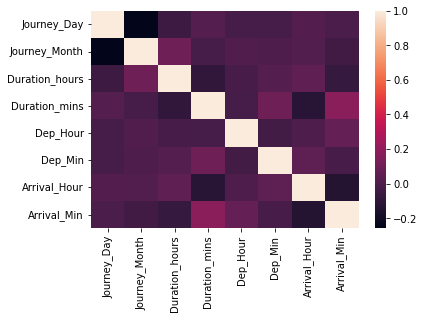

In [126]:
sns.heatmap(Test.corr())

### Statistical

In [120]:
Test.describe()

,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,12.026956,5.607263,10.189068,28.397604,12.603519,24.891426,13.585174,24.558218
std,8.564408,3.042952,8.390683,16.747651,5.686673,19.086522,7.040396,16.775436
min,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,3.000000,2.000000,15.000000,8.000000,5.000000,8.000000,10.000000
50%,6.000000,5.000000,8.000000,30.000000,12.000000,25.000000,15.000000,25.000000
75%,21.000000,6.000000,15.000000,45.000000,18.000000,45.000000,19.000000,35.000000
max,27.000000,12.000000,40.000000,55.000000,23.000000,55.000000,23.000000,55.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present. It gives the summary of numerical data.

In [122]:
cat_col = []
num_col = []

for i in Test.dtypes.index:
    if Test.dtypes[i] == 'object':
        cat_col.append(i)
    else:
        num_col.append(i)
        
        
print('Categorical Columns \n',cat_col)
print('Numerical Columns \n',num_col)

Categorical Columns 
 ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']
Numerical Columns 
 ['Journey_Day', 'Journey_Month', 'Duration_hours', 'Duration_mins', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min']


### Univariate Analysis

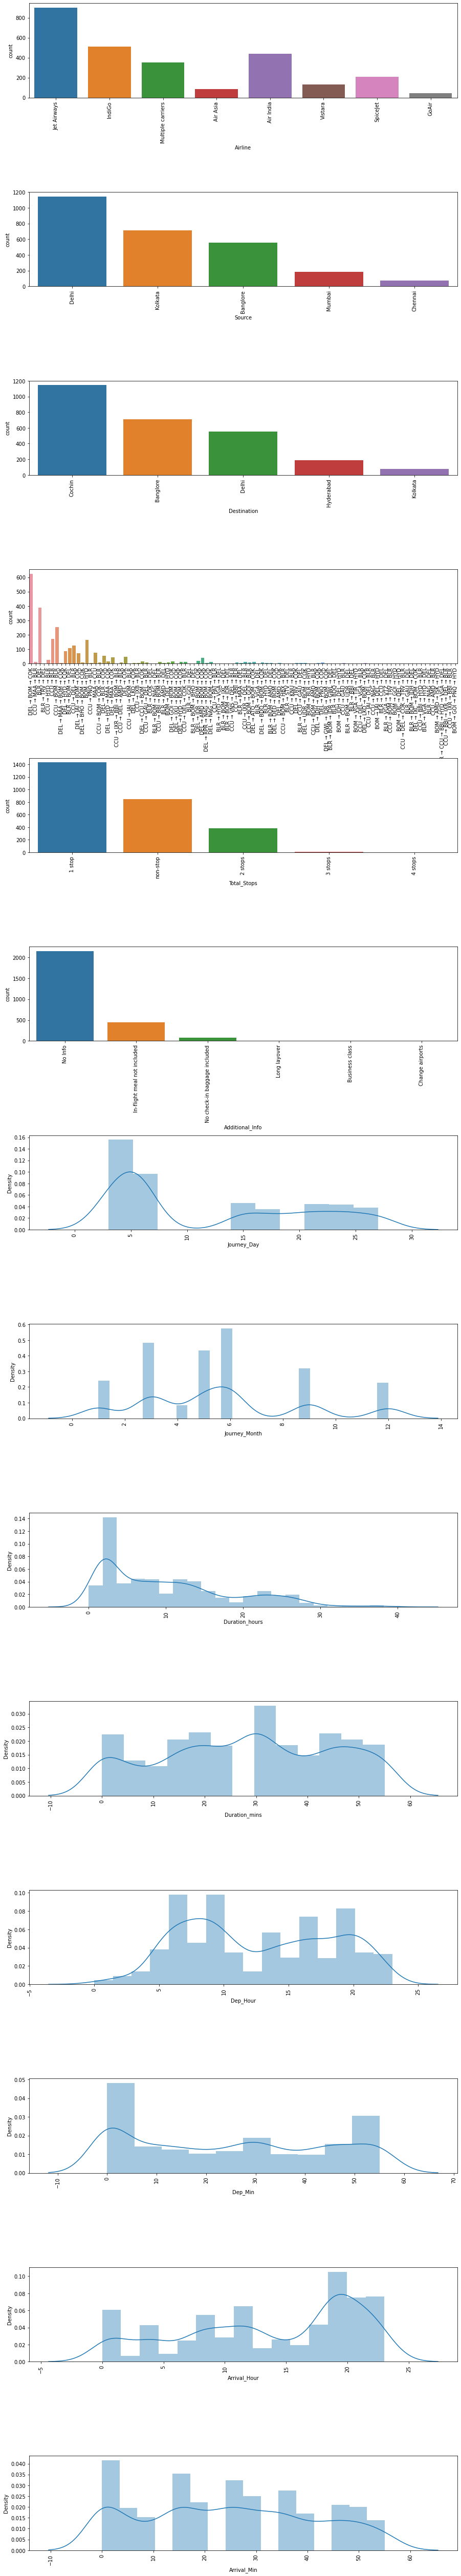

In [125]:
plt.figure(figsize=[15,200])
for i, column_data in enumerate(Test.dtypes.items()):
    column,dtype = column_data
    plt.subplot(30,1,i+1)
    plt.subplots_adjust(hspace=1)
    
    if dtype == 'object':
        plt.xticks(rotation=90)
        sns.countplot(Test[column])
    else:
        plt.xticks(rotation=90)
        sns.distplot(Test[column],kde=True)

#### we can see that
- Most of the Flight from Jet Airways
- Most Flight start from Delhi
- Most of Flight Lands at Cochi
- Most Flight fare ranges between 0 to 20000

### Identifying the outliers

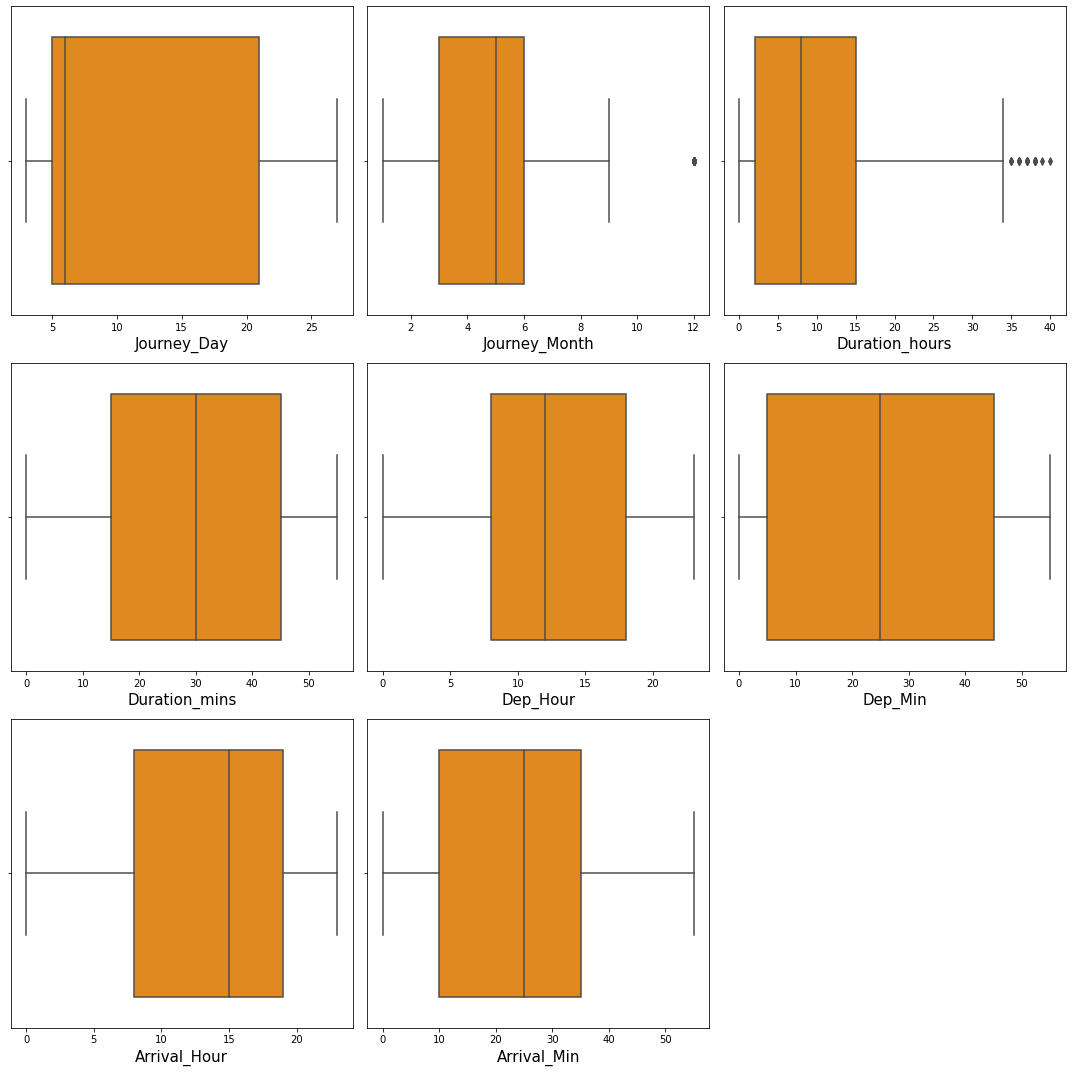

In [124]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(Test[column],color="darkorange")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

### Removing outliers

In [128]:
feature = Test[['Duration_hours','Journey_Month']]


z=np.abs(zscore(feature))

z

,Duration_hours,Journey_Month
0,0.022537,0.129089
1,0.737750,2.101227
2,1.527090,0.199601
3,0.335069,0.199601
4,0.976154,0.129089
...,...,...
2666,1.527090,0.129089
2667,0.976154,0.856981
2668,0.499346,0.129089
2669,0.573473,0.129089


In [129]:
New_Test = Test[(z<3).all(axis=1)] 
New_Test

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,6,6,10,55,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No Info,5,12,4,0,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,23,45,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,21,5,13,0,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No Info,24,6,2,50,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No Info,6,6,23,55,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No Info,27,3,2,35,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,3,6,6,35,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,3,6,15,15,4,0,19,15


### Checking skewness in the data

In [131]:
New_Test.skew().sort_values()

Arrival_Hour     -0.432551
Duration_mins    -0.110629
Dep_Hour          0.083357
Arrival_Min       0.110111
Dep_Min           0.132681
Journey_Day       0.475210
Journey_Month     0.591565
Duration_hours    0.795392
dtype: float64

In [132]:
New_Test["Duration_hours"] = np.log1p(New_Test["Duration_hours"])
New_Test["Journey_Month"] = np.log1p(New_Test["Journey_Month"])

In [133]:
New_Test.skew().sort_values()

Journey_Month    -0.541053
Arrival_Hour     -0.432551
Duration_hours   -0.134743
Duration_mins    -0.110629
Dep_Hour          0.083357
Arrival_Min       0.110111
Dep_Min           0.132681
Journey_Day       0.475210
dtype: float64

### Encoding

In [135]:
LE=LabelEncoder()
New_Test[categorical_col]= New_Test[categorical_col].apply(LE.fit_transform)
New_Test

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,4,2,1,76,0,4,6,1.945910,2.397895,55,17,30,4,25
1,3,3,0,65,0,4,5,2.564949,1.609438,0,6,20,10,20
2,4,2,1,76,0,2,21,1.791759,3.178054,45,19,15,19,0
3,5,2,1,76,0,4,21,1.791759,2.639057,0,8,0,21,0
4,0,0,2,16,4,4,24,1.945910,1.098612,50,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,0,4,6,1.945910,3.178054,55,20,30,20,25
2667,3,3,0,43,4,4,27,1.386294,1.098612,35,14,20,16,55
2668,4,2,1,76,0,4,3,1.945910,1.945910,35,21,50,4,25
2669,1,2,1,76,0,4,3,1.945910,2.772589,15,4,0,19,15


### Feature Scaling using Standard Scalarization

In [137]:
scaler = StandardScaler()
New_Test = pd.DataFrame(scaler.fit_transform(New_Test), columns=New_Test.columns)
New_Test

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,0.233214,0.031440,-0.167242,0.804966,-0.791072,0.393727,-0.706193,0.344970,0.374141,1.583185,0.766320,0.272445,-1.354818,0.025591
1,-0.348833,0.873978,-1.175634,0.398570,-0.791072,0.393727,-0.823069,1.565339,-0.579376,-1.697747,-1.172433,-0.252462,-0.503215,-0.272182
2,0.233214,0.031440,-0.167242,0.804966,-0.791072,-2.166466,1.046954,0.041078,1.317622,0.986652,1.118821,-0.514916,0.774190,-1.463273
3,0.815260,0.031440,-0.167242,0.804966,-0.791072,0.393727,1.046954,0.041078,0.665790,-1.697747,-0.819933,-1.302277,1.058057,-1.463273
4,-2.094973,-1.653635,0.841150,-1.411740,1.429790,0.393727,1.397583,0.344970,-1.197140,1.284918,1.823822,1.584714,-1.638686,1.216682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2648,-1.512927,0.873978,-1.175634,-0.118662,-0.791072,0.393727,-0.706193,0.344970,1.317622,1.583185,1.295071,0.272445,0.916123,0.025591
2649,-0.348833,0.873978,-1.175634,-0.414222,1.429790,0.393727,1.748212,-0.758252,-1.197140,0.390119,0.237569,-0.252462,0.348388,1.812227
2650,0.233214,0.031440,-0.167242,0.804966,-0.791072,0.393727,-1.056822,0.344970,-0.172465,0.390119,1.471321,1.322260,-1.354818,0.025591
2651,-1.512927,0.031440,-0.167242,0.804966,-0.791072,0.393727,-1.056822,0.344970,0.827275,-0.802948,-1.524934,-1.302277,0.774190,-0.569955


### Prediction Results

In [138]:
# Predicting the flight price from the features of the testing data 
Predicted_Price = Fare.predict(New_Test)
Predicted_Price

array([13681.307,  4625.892, 12331.761, ..., 17254.76 , 13192.548,
        7430.343], dtype=float32)

### DataFrame and Saving the predictions

In [139]:
Prediction = pd.DataFrame()
Prediction['Price']= Predicted_Price
Prediction

,Price
0,13681.306641
1,4625.892090
2,12331.760742
3,10622.694336
4,2774.596191
...,...
2648,9334.910156
2649,5227.926758
2650,17254.759766
2651,13192.547852


Here we are adding the predicted price output to our original test dataset to complete it with features and target column.

### Saving the predictions

In [140]:
Prediction.to_csv("Predicted_Flight_Price_Data.csv", index=False)